In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("rent_day.csv")

In [3]:
df.head() 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#shape of the whole dataset.
df.shape

(731, 16)

the dataset has 731 rows and 16 featured columns.

In [5]:
#taking a look of datatypes of the features
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.6+ KB


In [6]:
#lets us see the central tendency analysis
df.describe() 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

renaming the columns for better understanding of the variables.

In [4]:
#Rename the columns
df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [5]:
df.dtypes

rec_id                 int64
datetime              object
season                 int64
year                   int64
month                  int64
holiday                int64
weekday                int64
workingday             int64
weather_condition      int64
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual                 int64
registered             int64
total_count            int64
dtype: object

In [16]:
df.head() 

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df['datetime']=pd.to_datetime(df.datetime)

In [12]:
df.head() 

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
df.isnull()
#looking for null values if present

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum() 

rec_id               0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

There are no null values in the datset.

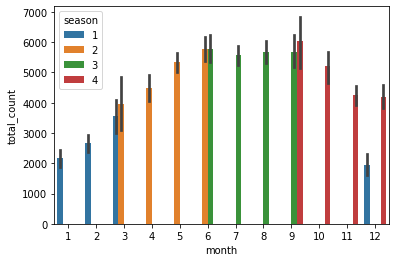

In [15]:

sns.barplot(x='month',y='total_count',data=df,hue="season")

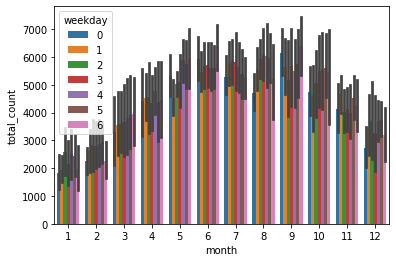

In [16]:
sns.barplot(x='month',y='total_count',data=df,hue='weekday')
   

From the above plots, we can observed that increasing the bike rental count in springe and summer season and then decreasing the bike rental count in fall and winter season.

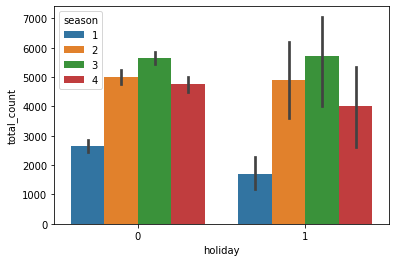

In [17]:
sns.barplot(data=df,x='holiday',y='total_count',hue='season')

From the above bar plot, we can observed that during no holiday the bike rental counts is higher compared to during holiday for different seasons.

Here, 0->No holiday, 1-> holiday

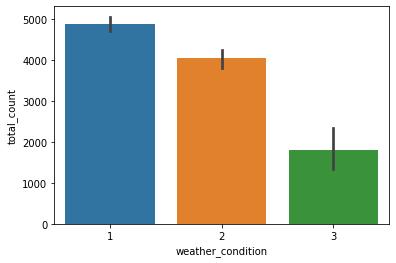

In [18]:
sns.barplot(x='weather_condition',y='total_count',data=df) 

the total rentals are high in season 1 
which has mostly sunny days followed by 
the winter season.

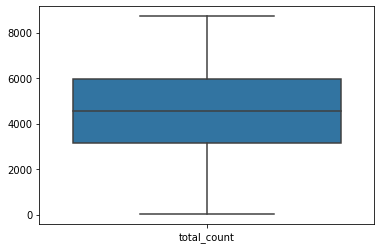

In [19]:
sns.boxplot(data=df[['total_count']])

there are zero outliers in the total
count column.

now lets take a look if there are any 
outliers in the data

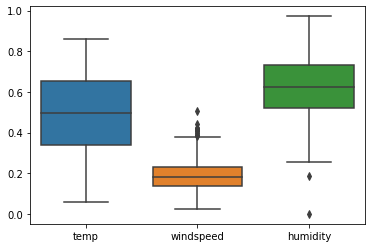

In [20]:
sns.boxplot(data=df[['temp','windspeed','humidity']])

as we can see there are outliers in the normalized 
wind speed and humidity .

we will see the correlation of the atrributes with each other and try to plot a correlation matrix using heatmap

In [21]:
comat=df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()

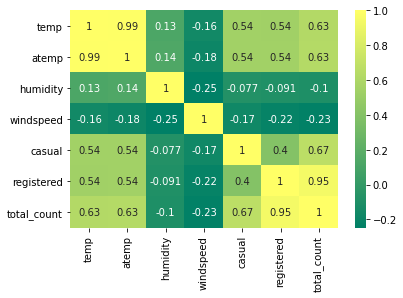

In [22]:
sns.heatmap(comat,annot=True,cmap="summer")

we can see the correlation btw features 
from the following heatmap.
We can observe that relation between
temp and atemp is very high.

In [23]:
comat

,temp,atemp,humidity,windspeed,casual,registered,total_count
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
humidity,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
total_count,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


building model 

In [9]:
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split
#import required modules.
from sklearn.metrics import mean_squared_error


In [10]:
from sklearn.model_selection import train_test_split

In [21]:
df.head() 

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
pd.get_dummies(df,drop_first=True)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [7]:
x=df.drop(["atemp","registered","total_count","rec_id","datetime"],axis=1) 
y=df["total_count"]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [12]:
from sklearn.linear_model import LinearRegression


In [13]:
lr_model=LinearRegression()
lr_model

LinearRegression()

In [14]:
lr_model.fit(x_train,y_train) 

LinearRegression()

In [15]:
lr_pred=lr_model.predict(x_test) 

In [16]:
lr_pred 

array([3901.09929401, 3122.58124846, 3993.5743655 , 4105.81109607,
       8326.38939828, 4803.85743204, 5265.37355921, 3346.55767879,
       2200.88309066, 4876.52250115, 2595.59473623, 1992.83398942,
        210.54729357, 1794.21202643, 7176.75920695, 3064.99629837,
       5369.7109291 , 5941.01795692, 3555.32046436, 4970.37380146,
       2180.57029887, 6936.56901007, 4811.9843145 , 2585.81875397,
       4671.3333392 , 3860.04143269, 7621.17919942, 4179.43832479,
       3005.36112634, 2788.68825882,  850.88027325, 3419.30017627,
       2312.05332598, 2216.93860255, 7779.06281259, 4766.69533649,
       1849.53028026, 2378.19483662, 6842.27958738, 3592.57588262,
       3399.42063441, 6320.94090014, 6587.05547746, 5100.96943653,
       5112.64378583, 5011.87926746, 6601.29288632, 4012.85092472,
       4072.87819794, 5299.8487245 , 2624.69704848, 6762.9936209 ,
       3477.16902595, 1589.13509596, 4536.58954497, 2122.0339643 ,
       1407.23170172, 6901.20192922, 5090.53238275, 1731.87279

In [17]:
y_test

404    3830
726    2114
159    3915
422    4322
512    6591
       ... 
394    3624
651    7109
487    6169
435    4911
541    6779
Name: total_count, Length: 220, dtype: int64

Linear Regression 

Linear Regression is the process of finding a line that best fits the data points available on the plot, so that we can use it to predict output values for inputs that are not present in the data set we have, with the belief that those outputs would fall on the line.

In [18]:
from sklearn.metrics import accuracy_score ,r2_score 

In [20]:
lr_r2_score=r2_score(y_test,lr_pred)

In [21]:
Lr_RME=(np.sqrt(mean_squared_error(y_test,lr_pred))) 


In [22]:
Lr_RME

668.6186402185676

In [23]:
lr_score=cross_val_score(lr_model,x,y,cv=3)

In [26]:
lr_score_train=cross_val_score(lr_model,x_train,y_train,cv=3)

In [27]:
lr_score_test=cross_val_score(lr_model,x_test,y_test,cv=3)

Decision Tree 

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

In [28]:
from sklearn.tree import DecisionTreeRegressor 

In [29]:
DT_model=DecisionTreeRegressor() 

In [30]:
DT_model.fit(x_train,y_train) 

DecisionTreeRegressor()

In [31]:
DT_pred=DT_model.predict(x_test)

In [32]:
DT_r2_score=r2_score(y_test,DT_pred) 

In [33]:
DT_score=cross_val_score(DT_model,x,y,cv=3) 

In [34]:
DT_score.mean() 

0.21974400005493414

In [35]:
DT_score_train=cross_val_score(DT_model,x_train,y_train,cv=3)

In [36]:
DT_score_train.mean() 

0.8057976614541094

In [37]:
DT_score_test=cross_val_score(DT_model,x_test,y_test,cv=3)

In [38]:
DT_score_test.mean() 

0.6951414606563988

In [39]:
DT_RME=(np.sqrt(mean_squared_error(y_test,DT_pred))) 

Random Forest

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
RF_model=RandomForestRegressor() 

In [42]:
RF_model.fit(x_train,y_train) 

RandomForestRegressor()

In [43]:
RF_pred=RF_model.predict(x_test)

In [46]:
RF_r2_score=r2_score(y_test,RF_pred) 

In [47]:
RF_score=cross_val_score(RF_model,x,y,cv=3)

In [48]:
RF_score.mean() 

0.4708184456632824

In [49]:
RF_score_train=cross_val_score(RF_model,x_train,y_train,cv=3)

In [50]:
RF_score_train.mean() 

0.9080459283004858

In [51]:
RF_score_test=cross_val_score(RF_model,x_test,y_test,cv=3)

In [52]:
RF_score_test.mean() 

0.8413852463747423

In [53]:
RF_RME=(np.sqrt(mean_squared_error(y_test,RF_pred))) 


SVM is a supervised machine learning algorithm which can be used for classification or regression problems. It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.

In [54]:
from sklearn.svm import SVR 

In [55]:
sv_model=SVR() 

In [57]:
sv_model.fit(x_train,y_train) 

SVR()

In [58]:
sv_pred=sv_model.predict(x_test) 

In [59]:
sv_r2=r2_score(y_test,sv_pred) 

In [60]:
sv_r2 

0.005015113594975529

In [61]:
sv_score=cross_val_score(sv_model,x,y,cv=3)

In [62]:
sv_score.mean() 

-1.2039108135123888

In [63]:
sv_score_train=cross_val_score(sv_model,x_train,y_train,cv=3)

In [64]:
sv_score_train.mean() 

0.011476456942820549

In [137]:
sv_score_test=cross_val_score(sv_model,x_test,y_test,cv=3)

In [65]:
SV_RME=(np.sqrt(mean_squared_error(y_test,sv_pred))) 


In [66]:
SV_RME 

2000.8075055665593

Ridge Regression 

Ridge regression is a way to create a  model when a data set has multicollinearity (correlations between predictor variables).

In [67]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 

In [68]:
RR_model=Ridge() 
RR_model.fit(x_train,y_train) 

Ridge()

In [69]:
RR_pred=RR_model.predict(x_test)

In [70]:
r2_RR=r2_score(y_test,RR_pred) 

In [71]:
r2_RR 

0.8884067284830934

In [72]:
RR_score_train=cross_val_score(RR_model,x_train,y_train,cv=10)

In [73]:
RR_score_train.mean() 

0.8831107465035097

In [74]:
RR_score_test=cross_val_score(RR_model,x_test,y_test,cv=10)

In [75]:
RR_score_test.mean() 

0.8633667568099958

In [76]:
RR_score=cross_val_score(RR_model,x,y,cv=10)

In [77]:
RR_score.mean() 

0.4247455474246394

In [78]:
RR_RME=(np.sqrt(mean_squared_error(y_test,RR_pred))) 


In [79]:
RR_RME 

670.0636685924671

Lasso Regression 

In [80]:
la_model=Lasso() 

In [81]:
la_model.fit(x_train,y_train) 

Lasso()

In [82]:
la_pred=la_model.predict(x_test) 

In [83]:
r2_lasso=r2_score(y_test,la_pred) 

In [84]:
r2_lasso 

0.8888068814776533

In [85]:
la_score_train=cross_val_score(la_model,x_train,y_train,cv=10)

In [86]:
la_score_train.mean() 

0.8832971482279166

In [87]:
la_score_test=cross_val_score(la_model,x_test,y_test,cv=10)

In [88]:
la_score_test.mean() 

0.8622442034235819

In [89]:
la_score=cross_val_score(la_model,x,y,cv=10)

In [93]:
la_score.mean() 

0.41805970524188424

In [94]:
LA_RME=(np.sqrt(mean_squared_error(y_test,la_pred))) 



In [95]:
LA_RME 

668.8612270104537

Elastic Net Model 

Elastic Net is the combination of Lasso and Ridge regression and it also works on the principle of penalty to compensate the error btw actual value and predicted value 

In [96]:
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor 

In [97]:
Enet_model=ElasticNet()

In [98]:
Enet_model.fit(x_train,y_train) 

ElasticNet()

In [99]:
Enet_pred=Enet_model.predict(x_test)

In [100]:
r2_Enet=r2_score(y_test,Enet_pred)

In [101]:
r2_Enet 

0.6991084160976229

In [102]:
Enet_score_train=cross_val_score(Enet_model,x_train,y_train,cv=10)

In [103]:
Enet_score_train.mean() 

0.688927281156897

In [104]:
Enet_score_test=cross_val_score(Enet_model,x_test,y_test,cv=10)


In [105]:
Enet_score_test.mean() 

0.6877243095695253

In [106]:
Enet_score=cross_val_score(Enet_model,x,y,cv=10)


In [107]:
Enet_score.mean() 

-1.114293712522562

In [108]:
Enet_RME=(np.sqrt(mean_squared_error(y_test,Enet_pred))) 



In [109]:
Enet_RME 

1100.277130458903

In [110]:
knn=KNeighborsRegressor() 

In [111]:
knn.fit(x_train,y_train) 

KNeighborsRegressor()

In [112]:
knn_pred=knn.predict(x_test) 

In [118]:
knn_r2_score=r2_score(y_test,knn_pred) 

In [119]:
knn_score_train=cross_val_score(knn,x_train,y_train,cv=10)


In [120]:
knn_score_train.mean() 

0.5437689005115546

In [121]:
knn_score_test=cross_val_score(knn,x_test,y_test,cv=10)


In [122]:
knn_score_test.mean() 

0.475754728146985

In [128]:
knn_score=cross_val_score(knn,x,y,cv=3)

In [123]:
KNN_RME=(np.sqrt(mean_squared_error(y_test,knn_pred))) 


In [124]:
KNN_RME 

1277.6747687605296

In [144]:
a={
    "model":["Linear Regression","Decision Tree","Random  Forest","SVR","KNeighborsRegressor","Ridge Regressor","Lasso Regressor","ElasticNet"],
    "r2_Score":[lr_r2_score,DT_r2_score,RF_r2_score,sv_r2,knn_r2_score,r2_RR,r2_lasso,r2_Enet],
    "val_score":[lr_score.mean(),DT_score.mean(),RF_score.mean(),sv_score.mean(),knn_score.mean(),RR_score.mean(),la_score.mean(),Enet_score.mean()],
    "val_score_train":[lr_score_train.mean(),DT_score_train.mean(),RF_score_train.mean(),sv_score_train.mean(),knn_score_train.mean(),RR_score_train.mean(),la_score_train.mean(),Enet_score_train.mean()],
    "val_score_test":[lr_score_test.mean(),DT_score_test.mean(),RF_score_test.mean(),sv_score_test.mean(),knn_score_test.mean(),RR_score_test.mean(),la_score_test.mean(),Enet_score_test.mean()],
    "RME_score":[Lr_RME,DT_RME,RF_RME,SV_RME,KNN_RME,RR_RME,LA_RME,Enet_RME]
    
    
}

In [146]:
report=pd.DataFrame(a)

In [147]:
report 

,model,r2_Score,val_score,val_score_train,val_score_test,RME_score
0,Linear Regression,0.888888,0.788762,0.884602,0.864520,668.618640
1,Decision Tree,0.853312,0.219744,0.805798,0.695141,768.236268
2,Random Forest,0.921289,0.470818,0.908046,0.841385,562.748055
3,SVR,0.005015,-1.203911,0.011476,0.001194,2000.807506
4,KNeighborsRegressor,0.594261,-0.197608,0.543769,0.475755,1277.674769
5,Ridge Regressor,0.888407,0.424746,0.883111,0.863367,670.063669
6,Lasso Regressor,0.888807,0.418060,0.883297,0.862244,668.861227
7,ElasticNet,0.699108,-1.114294,0.688927,0.687724,1100.277130


Here we can see from the final report that the accuracy values for linear regression ,ridge regression and lasso regression are not much different because ridge and lasso are use to perform predictions on data with multicollinearity i.e. features with more correlation but here we removed those features earlier.

considering RMSE the best model we got is Random Forest with RMSE score of 562 which is a quite good score as compared to other 

In [2]:
d=pd.read_csv("rent_day.csv") 